In [ ]:
%pip install underthesea
%pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11.0/11.0 MB 54.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.0/1.0 MB 49.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 591.3/591.3 KB 33.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [ ]:
from underthesea import word_tokenize
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


In [ ]:
!pip install vncorenlp
!pip install fastBPE
!pip install fairseq
!pip install tensorboard --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.6/2.6 MB 36.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645950 sha256=26ad5d846c22c6af7f00fbec0ffd2e131b15b7ae4c8eb9ccd39a40e952cc97b9
  Stored in directory: /root/.cache/pip/wheels/3c/e9/86/706911c12e307aeb9a2702399f0dad38d36f1d6f9dde8af35e
Successfully built vncorenlp
ERROR: Operation cancelled by user
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user
ERROR: Operation cancelled by user
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

# T·∫°o dataset & ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu

## 1. Gi·∫£i n√©n file dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CS221/

/content/drive/MyDrive/CS221


In [ ]:
import os 
os.listdir()

['PhoBERT_base_transformers',
 'PhoBERT_base_transformers.tar.gz',
 'UIT-VSMEC',
 'vncorenlp',
 'data_gui_bao.csv',
 'data.csv',
 'stopwords.txt',
 'runs',
 'data_aug.csv',
 'data_aug_N.csv',
 'data_aug2.csv',
 'test.csv',
 'data_aug1.csv',
 'confusion_matrix.png',
 'test_processed.csv',
 'pytorch_phoBERT_sentiment.bin',
 'test_preprocess.csv',
 'data_merged.csv']

## 2. L·∫•y danh s√°ch c√°c stopwords

In [ ]:
stopwords = []

with open('stopwords.txt', 'r+', encoding='utf-8') as f:
    for line in f:
        stopwords.append(line.strip())

print(len(stopwords))

1942


## 3. ƒê·ªãnh nghƒ©a c√°c h√†m h·ªó tr·ª£ ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu

In [ ]:
import re

def strip_emoji(text):
	RE_EMOJI = re.compile(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])')
	return RE_EMOJI.sub(r'', text)

def remove_special_char(text):
	special_character = re.compile("ÔøΩ+")
	return special_character.sub(r'', text)

def remove_punctuation(text):
	punctuation = re.compile(r"[!#$%&()*+;<=>?@[\]^_`{|}~]")
	return punctuation.sub(r"", text)

def remove_number(text):
	return re.sub(" \d+", " ", text)

def normalize_annotatation(text):
	khach_san = "\bkhach san ?|\bksan ?|\bks ?"
	return re.sub("\bnv ?", "nh√¢n vi√™n",re.sub(khach_san, "kh√°ch s·∫°n", text))

def clean_text(text):
	return {"Review": normalize_annotatation(remove_number(remove_special_char(remove_punctuation(strip_emoji(text["Review"].lower())))))}


In [ ]:
# Ti·ªÅn x·ª≠ l√Ω: lo·∫°i b·ªè c√°c d·∫•u , . ! ?,
# lo·∫°i b·ªè d·∫•u c√°ch th·ª´a v√† chuy·ªÉn string v·ªÅ d·∫°ng lowercase.

def preprocess(sentence):
    sentence = sentence.strip()
    sentence = sentence.replace(',', '')
    sentence = sentence.replace('.', '')
    sentence = sentence.replace('?', '')
    sentence = sentence.replace('!', '')
    sentence = sentence.replace('"', '')
    sentence = sentence.replace('  ', ' ')

    specials_ = {
        ':)' : 'colonsmile',
        ':(' : 'colonsad',
        '@@' : 'colonsurprise',
        '<3' : 'colonlove',
        ':d' : 'colonsmilesmile',
        ':3' : 'coloncontemn',
        ':v' : 'colonbigsmile',
        ':_' : 'coloncc',
        ':p' : 'colonsmallsmile',
        '>>' : 'coloncolon',
        ':">' : 'colonlovelove',
        '^^' : 'colonhihi',
        ':' : 'doubledot',
        ":'(" : 'colonsadcolon',
        ':‚Äô(' : 'colonsadcolon',
        ':@' : 'colondoublesurprise',
        'v.v' : 'vdotv',
        '...' : 'dotdotdot',
        '/' : 'fraction',
        'c#' : 'cshrap',
    }

    for key in specials_.keys():
        sentence = sentence.replace(key, specials_[key])
    return sentence.lower().strip()

## 4. T·∫°o dataset

Ph·∫ßn dataset train & test (tui list ra v·∫ßy m√† B·∫£o cho tui c√°i 1, 2, 3, 4 l√† ƒëc r√≤i, 5 vs 6 B·∫£o h√¥ng l√†m c≈©ng ƒëc):
1. show sample data (10 c√¢u)
2. chart distribution th·ªëng k√™ class
3. sample 3 c√¢u cho m·ªói class
4. th·ªëng k√™ distrubution ƒë·ªô d√†i c√¢u
5. sample c√¢u min, max v√† c√¢u vs 3 c√¢u n·∫±m trong nh√≥m freq t·ª´ ph·ªï bi·∫øn nh·∫•t
6. ch·ªìng 2 c√°i chart dis (ƒë·ªÉ n√≥i v·ªÅ correlation)

In [ ]:
#y 1
for i in range(10,20):
    # print(train_dataset.iloc[i]["label"])
    # print(train_dataset.iloc[i]["Review"])
    print("Review: ", train_dataset.iloc[i]["Review"])
    print("Label: ", train_dataset.iloc[i]["labels"])


Review:  Tuy kh√¥ng ti·ªán nghi nh∆∞ng gi√° c·∫£ b√¨nh d√¢n nh·∫•t Quy Nh∆°n
Label:  4
Review:  Gi∆∞·ªùng h∆°i m·ªÅm, kh√¥ng ph√π h·ª£p l·∫Øm v·ªõi ng∆∞·ªùi b·ªã ƒëau l∆∞ng
Label:  3
Review:  C√≥ th·ªÉ do d·ªãch n√™n √≠t kh√°ch. Ph√≤ng c√≥ m√πi m·ªëc
Label:  2
Review:  C√°ch √¢m k√©m, ko c√≥ h·ªó tr·ª£ KH v·ªÅ c√°c v·∫≠t d·ª•ng m∆∞·ª£n th√™m v√†o bu·ªïi t·ªëi (nh∆∞ t√¥ mu·ªóng)
Label:  2
Review:  30/4 v·ª´a r·ªìi ƒë√¥ng kh√°ch, v·ª£ m√¨nh ƒë·ª£i 30" ch∆∞a ƒëi ƒë∆∞·ª£c thang m√°y.
Label:  3
Review:  C√≥ ch·ªó ƒë·ªÉ xe m√°y ·ªü t·∫ßng tr·ªát, ·ªü trong h·∫ªm nh∆∞ng ƒë∆∞·ªùng ƒë·ªß r·ªông ƒë·ªÉ xe 4 b√°nh v√†o t·ªõi n∆°i.
Label:  2
Review:  Ph√≤ng s·∫°ch s·∫Ω g·ªçn g√†ng, nh√¢n vi√™n nhi·ªát t√¨nh th√¢n thi·ªán v√† chu ƒë√°o.
Label:  5
Review:  Ph√≤ng kh√° c≈©. M√¨nh ·ªü 2 l·∫ßn 1 l·∫ßn ·ªü ph√≤ng b√¨nh th∆∞·ªùng th√¨ th·∫•y ok. 1 l·∫ßn ·ªü studio view bi·ªÉn th·∫•t v·ªçng th·ª±c s·ª±. View bi·ªÉn ƒë√£ b·ªã ch·∫Øn b·ªüi c√¥ng tr√¨nh (n√†y th√¨ kh√¥ng ph·∫£i l·ªói c·ªßa kh√°ch s·∫°n nh∆∞ng

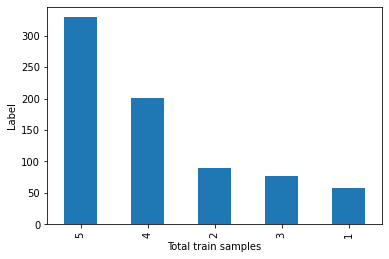

In [ ]:
#D·ªØ li·ªáu tr∆∞·ªõc khi tƒÉng c∆∞·ªùng
train_dataset = pd.read_csv("data.csv")
count = train_dataset['labels'].value_counts()
count.plot.bar()
plt.ylabel('Label')
plt.xlabel('Total train samples')
plt.show()

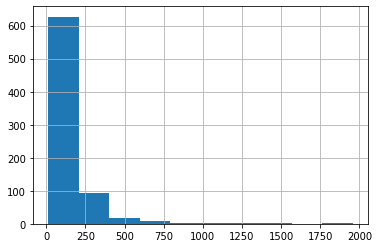

In [ ]:
train_dataset['Review'].str.len().hist()

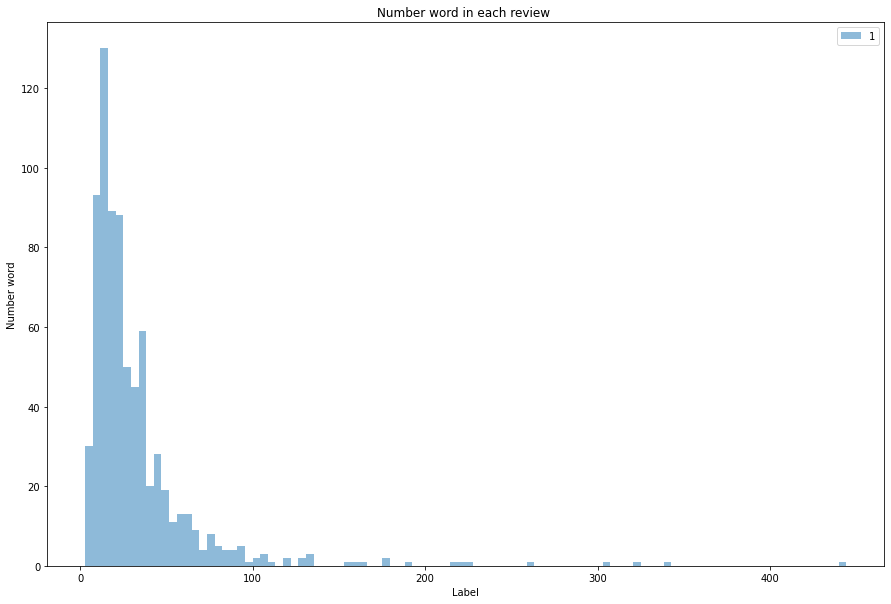

In [ ]:
train_dataset["word_count"] = train_dataset["Review"].apply(lambda x: len(str(x).split(" ")))
#visualize number word in each label
plt.figure(figsize=(15,10))
plt.title("Number word in each review ")
plt.xlabel("Label")
plt.ylabel("Number word")
plt.hist(train_dataset['word_count'],bins=100,alpha=0.5,label='1')
# plt.hist(train_dataset[train_dataset['labels']==2]['word_count'],bins=100,alpha=0.5,label='2')
# #plt.hist(train_dataset[train_dataset['labels']==3]['word_count'],bins=100,alpha=0.5,label='3')
# #plt.hist(train_dataset[train_dataset['labels']==4]['word_count'],bins=100,alpha=0.5,label='4')
# plt.hist(train_dataset[train_dataset['labels']==5]['word_count'],bins=100,alpha=0.5,label='5')
plt.legend(loc='upper right')
plt.show()

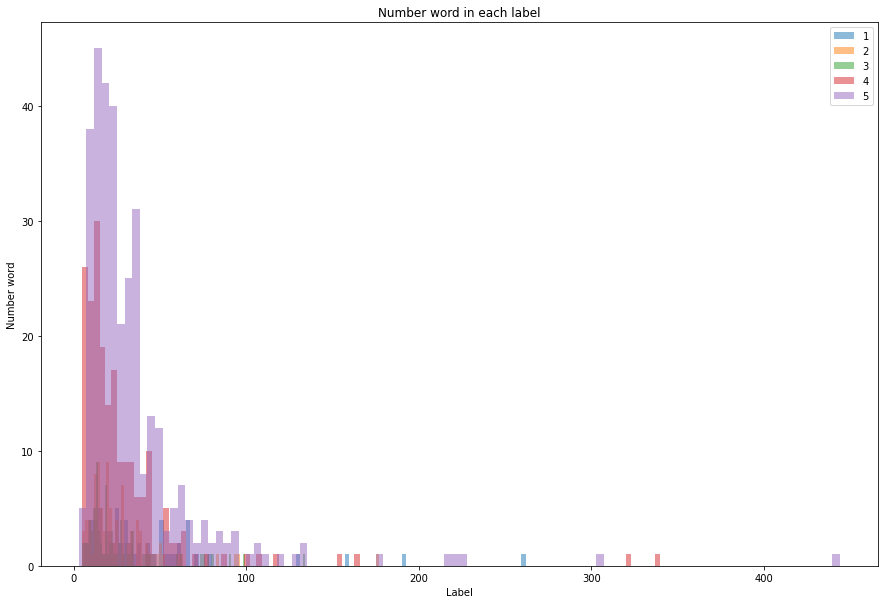

In [ ]:
train_dataset["word_count"] = train_dataset["Review"].apply(lambda x: len(str(x).split(" ")))
#visualize number word in each label
plt.figure(figsize=(15,10))
plt.title("Number word in each label")
plt.xlabel("Label")
plt.ylabel("Number word")
plt.hist(train_dataset[train_dataset['labels']==1]['word_count'],bins=100,alpha=0.5,label='1')
plt.hist(train_dataset[train_dataset['labels']==2]['word_count'],bins=100,alpha=0.5,label='2')
plt.hist(train_dataset[train_dataset['labels']==3]['word_count'],bins=100,alpha=0.5,label='3')
plt.hist(train_dataset[train_dataset['labels']==4]['word_count'],bins=100,alpha=0.5,label='4')
plt.hist(train_dataset[train_dataset['labels']==5]['word_count'],bins=100,alpha=0.5,label='5')
plt.legend(loc='upper right')
plt.show()

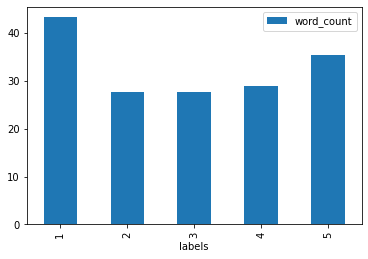

In [ ]:
train_dataset[['labels','word_count']].groupby(['labels']).mean().plot.bar()

In [ ]:
train_dataset[['labels','word_count']].groupby(['labels']).mean().plot.bar()

In [ ]:
labels_list=[1,2,3,4,5]
for label in labels_list:
    #print 3 samples for each label
    print("Label: ",label)
    df_label=train_dataset[train_dataset['labels']==label]
    #print review 3 sample 
    print(df_label['Review'].iloc[3])
    print(df_label['Review'].iloc[5])
    print(df_label['Review'].iloc[10])

Label:  1
M√¨nh ƒë√£ ƒë·∫∑t 11 ph√≤ng cho k√¨ ngh·ªâ v√† r·∫•t th·∫•t v·ªçng.
kh√°ch ·ªü t·ª´ th·ª© 3 ƒë·∫øn th·ª© 7, m√† kh√°ch s·∫°n kh√¥ng h·ªÅ lau d·ªçn ph√≤ng.
Thi·∫øu nhi·ªÅu v·∫≠t dung c∆° b·∫£n: khƒÉn gi·∫•y tr√™n ph√≤ng, b√†n l√† h·ªèi nh√¢n vi√™n nhi·ªÅu l·∫ßn m·ªõi c√≥ do c·∫£ Ks c√≥ 1 b√†n l√† duy nh·∫•t.
Label:  2
Khe v·ªãn m·ªü c·ª≠a t·ªß qu·∫ßn √°o h∆°i c·∫°n n√™n khi m·ªü h∆°i kh√≥, d·ªÖ g√£y m√≥ng tay, n√™n kho√©t s√¢u h∆°n ho·∫∑c c√≥ n·∫Øm c·ª≠a b√™n ngo√†i.
C√°ch √¢m k√©m, ƒë√™m h√¥m ph√≤ng b√™n c·∫°nh c∆∞·ªùi nghe r√µ. Kh√¥ng c√≥ nh√¢n vi√™n h·ªó tr·ª£ x√°ch ƒë·ªì. View bi·ªÉn nh∆∞ng tr∆∞·ªõc m·∫∑t c√≥ c√¥ng tr√¨nh x√¢y d·ª±ng
V·ªã tr√≠ g·∫ßn bi·ªÉn nh∆∞ng do kh√°ch s·∫°n n·∫±m trong ng√µ n√™n view bi·ªÉn cƒÉn g√≥c kh√¥ng th·ª±c s·ª± ƒë·∫πp nh∆∞ trong h√¨nh
Label:  3
C√° nh√¢n m√¨nh th·∫•y ph√≤ng h∆°i thi·∫øu s√°ng
Ti·ªán nghi c√≥ m·ªôt s·ªë h·∫°n ch·∫ø. Kh√¥ng c√≥ b√†n ·ªßi trong ph√≤ng, mu·ªën ·ªßi ƒë·ªì ph·∫£i thu√™ kh√°ch s·∫°n. ƒê·ªëi v·ªõi ks 4 sao th√¨ t√¥i t

In [ ]:
near_avg=train_dataset[train_dataset['word_count']<35][train_dataset['word_count']>30]

<ipython-input-29-9d97a01ded0a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  near_avg=train_dataset[train_dataset['word_count']<35][train_dataset['word_count']>30]


In [ ]:
near_avg[:5]#top 5 cau trung binh

labels                                             Review  word_count
22       5  Nh√¢n vi√™n ph·ª•c v·ª• r·∫•t nhi·ªát t√¨nh, gi√° c·∫£ c≈©ng ...          32
48       5  Kh√°ch s·∫°n m·ªõi, s·∫°ch s·∫Ω, ·ªü v·ªã tr√≠ thu·∫≠n l·ª£i. Nh...          32
51       4  T·ª´ nh√¢n vi√™n ƒë·∫øn b·∫°n qu·∫£n l√Ω ai ƒë·ªÅu r·∫•t th√¢n t...          34
57       5  JW Marriott ƒëa ph·∫ßn c√≥ d·ªãch v·ª• t·ªët. Kh√¥ng ph·∫£i...          31
81       5  D·ªãch v·ª• ok.ql th√¢n thi·ªán , Nv ph·ª•c v·ª• chu·∫©n k ...          32

In [ ]:
train_dataset['word_count'].mean()

32.626490066225166

In [ ]:
#top thap nhat va cao nhat
max_review=train_dataset[train_dataset['word_count']==train_dataset['word_count'].max()]
min_review=train_dataset[train_dataset['word_count']==train_dataset['word_count'].min()]

In [ ]:
max_review

labels                                             Review  word_count
355       5  Theo m√¨nh th·∫•y l√† gi√° kh√° cao so v·ªõi c√°c ch·ªó k...         444

In [ ]:
min_review

labels         Review  word_count
631       5  Ph√≤ng s·∫°ch s·∫Ω           3

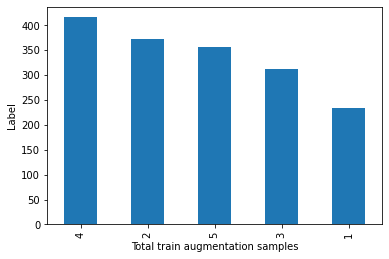

In [ ]:
train_dataset = pd.read_csv("data_merged.csv")
count = train_dataset['labels'].value_counts()
count.plot.bar()
plt.ylabel('Label')
plt.xlabel('Total train augmentation samples')
plt.show()

In [ ]:
print(len(train_dataset))

1691


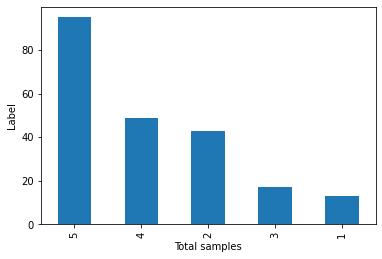

In [ ]:
test_dataset =  pd.read_csv("test.csv")
test_dataset['labels'].value_counts()
count = test_dataset['labels'].value_counts()
count.plot.bar()
plt.ylabel('Label')
plt.xlabel('Total samples')
plt.show()


# Data Preprocessing and Vectorize

In [ ]:
#emoji
text="5,C√°i gi∆∞·ªùng n√≥ b·ªã d√≠nh q√° üòã ng·ªß m√† k t·ªânh dc kkk"
print(text)

print(strip_emoji(text))

5,C√°i gi∆∞·ªùng n√≥ b·ªã d√≠nh q√° üòã ng·ªß m√† k t·ªânh dc kkk
5,C√°i gi∆∞·ªùng n√≥ b·ªã d√≠nh q√°  ng·ªß m√† k t·ªânh dc kkk


In [ ]:
#remove_punctuation
text="Tho√°ng m√°t, s·∫°ch s·∫Ω..ph√≤ng studio view ƒë·∫πp (ph√≤ng tr√™n t·∫ßng cao n·ªØa th√¨ ƒë·∫πp :))). ƒê·ªì ƒÉn h∆°i √≠t m√≥n nh∆∞ng ngon."
print(text)
print(preprocess(text))
print()

Tho√°ng m√°t, s·∫°ch s·∫Ω..ph√≤ng studio view ƒë·∫πp (ph√≤ng tr√™n t·∫ßng cao n·ªØa th√¨ ƒë·∫πp :))). ƒê·ªì ƒÉn h∆°i √≠t m√≥n nh∆∞ng ngon.
tho√°ng m√°t s·∫°ch s·∫Ωph√≤ng studio view ƒë·∫πp (ph√≤ng tr√™n t·∫ßng cao n·ªØa th√¨ ƒë·∫πp colonsmile)) ƒë·ªì ƒÉn h∆°i √≠t m√≥n nh∆∞ng ngon


In [ ]:
text="Ph√≤ng gia ƒë√¨nh nh∆∞ng b·ªã t√°ch th√†nh 2 ph√≤ng gh√©p v·ªõi 4 gi∆∞·ªùng n√™n kg th√≠ch l·∫Øm v·ªõi c√πng 1 ph√≤ng"
print(text)
print(remove_number(text))

Ph√≤ng gia ƒë√¨nh nh∆∞ng b·ªã t√°ch th√†nh 2 ph√≤ng gh√©p v·ªõi 4 gi∆∞·ªùng n√™n kg th√≠ch l·∫Øm v·ªõi c√πng 1 ph√≤ng
Ph√≤ng gia ƒë√¨nh nh∆∞ng b·ªã t√°ch th√†nh  ph√≤ng gh√©p v·ªõi  gi∆∞·ªùng n√™n kg th√≠ch l·∫Øm v·ªõi c√πng  ph√≤ng


In [ ]:
text="Ch·∫•m 10ƒë cho Fleur Hotel Quy Nh∆°n* ∆Øu ƒëi·ªÉm: ks ƒë·∫πp, ƒë·ªëi di·ªán bi·ªÉn, buffet s√°ng ngon, nh√¢n vi√™n v√¥ c√πng ∆∞ng √Ω, th√¢n thi·ªán. ƒê·∫∑c bi·ªát ch·ªã l·ªÖ t√¢n Minh Hi·∫øu r·∫•t ƒë√°ng y√™u.* ƒêi·ªÉm tr·ª´ nh·ªè l√† c√°ch √¢m ph√≤ng k√©m qu√°:("
print(normalize_annotatation(text))

Ch·∫•m 10ƒë cho Fleur Hotel Quy Nh∆°n* ∆Øu ƒëi·ªÉm: kh√°ch s·∫°n ƒë·∫πp, ƒë·ªëi di·ªán bi·ªÉn, buffet s√°ng ngon, nh√¢n vi√™n v√¥ c√πng ∆∞ng √Ω, th√¢n thi·ªán. ƒê·∫∑c bi·ªát ch·ªã l·ªÖ t√¢n Minh Hi·∫øu r·∫•t ƒë√°ng y√™u.* ƒêi·ªÉm tr·ª´ nh·ªè l√† c√°ch √¢m ph√≤ng k√©m qu√°:(


In [ ]:
#remove stopword
remove_VN_stopwords("Ph√≤ng gia ƒë√¨nh nh∆∞ng b·ªã t√°ch th√†nh 2 ph√≤ng gh√©p v·ªõi 4 gi∆∞·ªùng n√™n kg th√≠ch l·∫Øm v·ªõi c√πng 1 ph√≤ng")

'Ph√≤ng gia ƒë√¨nh t√°ch th√†nh 2 ph√≤ng gh√©p 4 gi∆∞·ªùng kg l·∫Øm 1 ph√≤n'

In [ ]:
text="Ch·∫•m 10ƒë cho Fleur Hotel Quy Nh∆°n* ∆Øu ƒëi·ªÉm: ks ƒë·∫πp, ƒë·ªëi di·ªán bi·ªÉn, buffet s√°ng ngon, nh√¢n vi√™n v√¥ c√πng ∆∞ng √Ω, th√¢n thi·ªán. ƒê·∫∑c bi·ªát ch·ªã l·ªÖ t√¢n Minh Hi·∫øu r·∫•t ƒë√°ng y√™u.* ƒêi·ªÉm tr·ª´ nh·ªè l√† c√°ch √¢m ph√≤ng k√©m qu√°:("
print(clean_text(text))

ch·∫•m 10ƒë cho fleur hotel quy nh∆°n ∆∞u ƒëi·ªÉm: kh√°ch s·∫°n ƒë·∫πp, ƒë·ªëi di·ªán bi·ªÉn, buffet s√°ng ngon, nh√¢n vi√™n v√¥ c√πng ∆∞ng √Ω, th√¢n thi·ªán. ƒë·∫∑c bi·ªát ch·ªã l·ªÖ t√¢n minh hi·∫øu r·∫•t ƒë√°ng y√™u. ƒëi·ªÉm tr·ª´ nh·ªè l√† c√°ch √¢m ph√≤ng k√©m qu√°:


In [ ]:
print(normalize_annotatation(text))

Ch·∫•m 10ƒë cho Fleur Hotel Quy Nh∆°n* ∆Øu ƒëi·ªÉm: ks ƒë·∫πp, ƒë·ªëi di·ªán bi·ªÉn, buffet s√°ng ngon, nh√¢n vi√™n v√¥ c√πng ∆∞ng √Ω, th√¢n thi·ªán. ƒê·∫∑c bi·ªát ch·ªã l·ªÖ t√¢n Minh Hi·∫øu r·∫•t ƒë√°ng y√™u.* ƒêi·ªÉm tr·ª´ nh·ªè l√† c√°ch √¢m ph√≤ng k√©m qu√°:(


In [ ]:
text="Ph√≤ng s·∫°ch s·∫Ω, th∆°m, ch·ªã lao c√¥ng c≈©ng d·ªÖ th∆∞∆°ng ho√† ƒë·ªìng. C√¥ ch√∫ ch·ªß c·ª±c k·ª≥ cute lu√¥n √° m·ªçi ng∆∞·ªùi. View ph√≤ng ƒë·∫πp, xung quanh y√™n tƒ©nh. M·ªçi ng∆∞·ªùi n√™n gh√© nhaaaa."
print(text)
text=remove_similarletter(text)
print(text)

Ph√≤ng s·∫°ch s·∫Ω, th∆°m, ch·ªã lao c√¥ng c≈©ng d·ªÖ th∆∞∆°ng ho√† ƒë·ªìng. C√¥ ch√∫ ch·ªß c·ª±c k·ª≥ cute lu√¥n √° m·ªçi ng∆∞·ªùi. View ph√≤ng ƒë·∫πp, xung quanh y√™n tƒ©nh. M·ªçi ng∆∞·ªùi n√™n gh√© nhaaaa.
Ph√≤ng s·∫°ch s·∫Ω, th∆°m, ch·ªã lao c√¥ng c≈©ng d·ªÖ th∆∞∆°ng ho√† ƒë·ªìng. C√¥ ch√∫ ch·ªß c·ª±c k·ª≥ cute lu√¥n √° m·ªçi ng∆∞·ªùi. View ph√≤ng ƒë·∫πp, xung quanh y√™n tƒ©nh. M·ªçi ng∆∞·ªùi n√™n gh√© nha.


In [ ]:
# B·ªè b·ªõt c√°c ch·ªØ c√°i gi·ªëng nhau li√™n ti·∫øp( Vd: quaaa -> qua)
def remove_similarletter(text):
    text = re.sub(r'([a-z])\1+', lambda m: m.group(1).lower(), text, flags=re.IGNORECASE)
    return text
def strip_emoji(text):
	emoji_pattern = re.compile("["
					u"\U0001F600-\U0001F64F" 
					u"\U0001F300-\U0001F5FF"  
					u"\U0001F680-\U0001F6FF"  
					u"\U0001F1E0-\U0001F1FF"  
					u"\U00002702-\U000027B0"
					u"\U000024C2-\U0001F251"
					"]+", flags=re.UNICODE)	
	return emoji_pattern.sub(r'', text)

def remove_special_char(text):
	special_character = re.compile("ÔøΩ+")
	return special_character.sub(r'', text)

def remove_punctuation(text):
	punctuation = re.compile(r"[!#$%&()*+;<=>?@[\]^_`{|}~]")
	return punctuation.sub(r"", text)

def remove_number(text):
	return re.sub(" \d+", " ", text)

def normalize_annotatation(text):
	replace_list = {
		'ship': 'v·∫≠n chuy·ªÉn', 'shop': 'c·ª≠a h√†ng', 'sho': 'c·ª≠a h√†ng', 'm': 'm√¨nh','mk':'m√¨nh','mjk':'m√¨nh', 'mik': 'm√¨nh', 'ko': 'kh√¥ng' , 'k': 'kh√¥ng', 'kh': 'kh√¥ng', 'khong': 'kh√¥ng', 'kg': 'kh√¥ng', 'khg': 'kh√¥ng','hok':'kh√¥ng','hong':'kh√¥ng', 'tl': 'tr·∫£ l·ªùi',
		'rep': 'tr·∫£ l·ªùi', 'r': 'r·ªìi', 'fb': 'facebook', 'face': 'faceook', 'thanks': 'c·∫£m ∆°n', 'thank': 'c·∫£m ∆°n', 'tks': 'c·∫£m ∆°n', 'tk': 'c·∫£m ∆°n', 'ok': 't·ªët', 'oki': 't·ªët', 'okie': 't·ªët', 'sp': 's·∫£n ph·∫©m',
		'dc': 'ƒë∆∞·ª£c','ƒëc':'ƒë∆∞·ª£c','dk':'ƒë∆∞·ª£c', 'vs': 'v·ªõi', 'ƒët': 'ƒëi·ªán tho·∫°i', 'thjk': 'th√≠ch', 'thik': 'th√≠ch', 'q√°': 'qu√°', 'tr·ªÉ': 'tr·ªÖ', 'bgjo': 'bao gi·ªù', 'h': 'gi·ªù', 'qa': 'qu√°', 'dep': 'ƒë·∫πp', 'xau': 'x·∫•u', 'ib': 'nh·∫Øn tin',
		'cute': 'd·ªÖ th∆∞∆°ng', 'sz': 'size', 'good': 't·ªët', 'god': 't·ªët', 'bt': 'b√¨nh th∆∞·ªùng','tr':'tri·ªáu','dag':'ƒëang','nhiu':'nhi√™u','mn':'m·ªçi ng∆∞·ªùi','m.n':'m·ªçi ng∆∞·ªùi','ac':'anh ch·ªã','sag':'sang','s':'sao',
		'sz': 'c·ª°', 'size': 'c·ª°', 'ƒëx': 'ƒë∆∞·ª£c', 'dk': 'ƒë∆∞·ª£c', 'dc': 'ƒë∆∞·ª£c', 'ƒëk': 'ƒë∆∞·ª£c','ae':'anh em','j':'g√¨','hnay':'h√¥m nay','lm':'l√†m','ktra':'ki·ªÉm tra','sp':'s·∫£n ph·∫©m','z√¥':'v√†o',
		'ƒëc': 'ƒë∆∞·ª£c', 'authentic': 'chu·∫©n ch√≠nh h√£ng', 'aut': 'chu·∫©n ch√≠nh h√£ng', 'auth ': 'chu·∫©n ch√≠nh h√£ng', 'thick': 'th√≠ch','v':'v·∫≠y','cng':'c≈©ng','cg':'c≈©ng','ns':'n√≥i','nv':'nh√¢n vi√™n',
		'gud': 't·ªët', 'god': 't·ªët', 'wel done': 't·ªët', 'good': 't·ªët', 'g√∫t': 't·ªët','ng':'ng∆∞·ªùi','chs':'ch∆°i','mng':'m·ªçi ng∆∞·ªùi','wa':'qu√°',
		's·∫•u': 'x·∫•u', 'gut': 't·ªët', 'tot': 't·ªët', 'nice': 't·ªët', 'perfect': 'r·∫•t t·ªët','trc':'tr∆∞·ªõc',
		'time': 'th·ªùi gian', 'q√°': 'qu√°','nc':'n√≥i chung','ace':'anh ch·ªã em',
		'product': 's·∫£n ph·∫©m', 'quality': 'ch·∫•t l∆∞·ª£ng', 'chat': 'ch·∫•t' , 'excelent': 'ho√†n h·∫£o', 'bad': 't·ªá', 'sad': 't·ªá',
		'beautiful': 'ƒë·∫πp', 'tl': 'tr·∫£ l·ªùi', 'r': 'r·ªìi', 'order': 'ƒë·∫∑t h√†ng',
		'ch·∫•t lg': 'ch·∫•t l∆∞·ª£ng', 'sd': 's·ª≠ d·ª•ng', 'dt': 'ƒëi·ªán tho·∫°i', 'nt': 'nh·∫Øn tin', 'tl': 'tr·∫£ l·ªùi', 's√†i': 'x√†i', 'bjo': 'bao gi·ªù',
		'thik': 'th√≠ch', 'sop': 'c·ª≠a h√†ng', 'fb': 'facebook', 'face': 'facebook', 'very': 'r·∫•t',
		'dep': 'ƒë·∫πp', 'xau': 'x·∫•u','tgdƒë':'th·∫ø gi·ªõi di ƒë·ªông','tgdd':'th·∫ø gi·ªõi di ƒë·ªông','ƒëmx':'ƒëi·ªán m√°y xanh',
		'iu': 'y√™u', 'fake': 'gi·∫£ m·∫°o', 'trl': 'tr·∫£ l·ªùi', '><': 'ti√™u c·ª±c',
		'por': 't·ªá', 'poor': 't·ªá', 'ib': 'nh·∫Øn tin', 'rep': 'tr·∫£ l·ªùi', 'fback': 'feedback', 'fedback': 'feedback',
		'bin': 'pin', 'cx': 'c≈©ng', 'nch': 'n√≥i chuy·ªán', 'ntn': 'nh∆∞ th·∫ø n√†o', 'vde': 'v·∫•n ƒë·ªÅ',"tv":"tivi","ks":"kh√°ch s·∫°n","nv":"nh√¢n vi√™n","KS":"kh√°ch s·∫°n","kg":"kh√¥ng"
	}
	text = text.split()
	len_ = len(text)
	for i in range(0, len_):    
		for k, v in replace_list.items():
			if (text[i]==k):
				text[i] = v
	return " ".join(text)

def clean_text(text):
	return normalize_annotatation((remove_special_char(remove_punctuation(strip_emoji(text.lower())))))
 
def preprocess(sentence):
    sentence = sentence.strip()
    sentence = sentence.replace(',', '')
    sentence = sentence.replace('.', '')
    sentence = sentence.replace('?', '')
    sentence = sentence.replace('!', '')
    sentence = sentence.replace('"', '')
    sentence = sentence.replace('  ', ' ')

    specials_ = {
        ':)' : 'colonsmile',
        ':(' : 'colonsad',
        '@@' : 'colonsurprise',
        '<3' : 'colonlove',
        ':d' : 'colonsmilesmile',
        ':3' : 'coloncontemn',
        ':v' : 'colonbigsmile',
        ':_' : 'coloncc',
        ':p' : 'colonsmallsmile',
        '>>' : 'coloncolon',
        ':">' : 'colonlovelove',
        '^^' : 'colonhihi',
        ':' : 'doubledot',
        ":'(" : 'colonsadcolon',
        ':‚Äô(' : 'colonsadcolon',
        ':@' : 'colondoublesurprise',
        'v.v' : 'vdotv',
        '...' : 'dotdotdot',
        '/' : 'fraction',
        'c#' : 'cshrap',
    }

    for key in specials_.keys():
        sentence = sentence.replace(key, specials_[key])
    return sentence.lower().strip()

In [ ]:
print(tokenize("ƒê·∫°i h·ªçc C√¥ng Ngh·ªá Th√¥ng Tin, ƒë·∫°i h·ªçc qu·ªëc gia H·ªì Ch√≠ Minh."))

['ƒê·∫°i h·ªçc', 'C√¥ng Ngh·ªá', 'Th√¥ng Tin', ',', 'ƒë·∫°i h·ªçc', 'qu·ªëc gia', 'H·ªì Ch√≠ Minh', '.']


In [ ]:
print(tokenize_VNCore("ƒê·∫°i h·ªçc C√¥ng Ngh·ªá Th√¥ng Tin, ƒë·∫°i h·ªçc qu·ªëc gia H·ªì Ch√≠ Minh."))

[['ƒê·∫°i_h·ªçc', 'C√¥ng_Ngh·ªá_Th√¥ng_Tin', ',', 'ƒë·∫°i_h·ªçc', 'qu·ªëc_gia', 'H·ªì_Ch√≠_Minh', '.']]


In [ ]:
from collections import defaultdict
import unicodedata as ud
import pandas as pd
import numpy as np
import math
import ast
import re

In [ ]:
def syllablize(sentence):
    word = '\w+'
    non_word = '[^\w\s]'
    digits = '\d+([\.,_]\d+)+'
    
    patterns = []
    patterns.extend([word, non_word, digits])
    patterns = f"({'|'.join(patterns)})"
    
    sentence = ud.normalize('NFC', sentence)
    tokens = re.findall(patterns, sentence, re.UNICODE)
    return [token[0] for token in tokens]
def load_n_grams(path):
    with open(path, encoding='utf8') as f:
        words = f.read()
        words = ast.literal_eval(words)
    return words

In [ ]:
def longest_matching(sentence, bi_grams, tri_grams):
    syllables = syllablize(sentence)
    syl_len = len(syllables)
    
    curr_id = 0
    word_list = []
    done = False
    
    while (curr_id < syl_len) and (not done):
        curr_word = syllables[curr_id]
        if curr_id >= syl_len - 1:
            word_list.append(curr_word)
            done = True
        else:
            next_word = syllables[curr_id + 1]
            pair_word = ' '.join([curr_word.lower(), next_word.lower()])
            if curr_id >= (syl_len - 2):
                if pair_word in bi_grams:
                    word_list.append('_'.join([curr_word, next_word]))
                    curr_id += 2
                else:
                    word_list.append(curr_word)
                    curr_id += 1
            else:
                next_next_word = syllables[curr_id + 2]
                triple_word = ' '.join([pair_word, next_next_word.lower()])
                if triple_word in tri_grams:
                    word_list.append('_'.join([curr_word, next_word, next_next_word]))
                    curr_id += 3
                elif pair_word in bi_grams:
                    word_list.append('_'.join([curr_word, next_word]))
                    curr_id += 2
                else:
                    word_list.append(curr_word)
                    curr_id += 1
    return word_list

In [ ]:
bi_grams = load_n_grams('bi_grams.txt')
tri_grams = load_n_grams('tri_grams.txt')
longest_matching('M√¨nh hay gh√© nh√† h√†ng Ngon ·ªü Tr·∫ßn H∆∞ng ƒê·∫°o ƒë·ªÉ d√πng b·ªØa v·ªõi b·∫°n b√® v√† ƒë·ªëi t√°c.', bi_grams, tri_grams)

['M√¨nh',
 'hay',
 'gh√©',
 'nh√†_h√†ng',
 'Ngon',
 '·ªü_Tr·∫ßn',
 'H∆∞ng',
 'ƒê·∫°o',
 'ƒë·ªÉ',
 'd√πng_b·ªØa',
 'v·ªõi',
 'b·∫°n_b√®',
 'v√†',
 'ƒë·ªëi_t√°c',
 '.']

In [ ]:
# H√†m t√°ch t·ª´, d√πng word_tokenize c·ªßa underthesea
def tokenize(sentence):
    return word_tokenize(sentence, format = 'word')
def tokenize_VNCore(sentence):
    return rdrsegmenter.tokenize(sentence)[0]
def tokenize_longest_matching(sentence):
    return longest_matching(sentence, bi_grams, tri_grams)
# Chuy·ªÉn c√¢u ti·∫øng Vi·ªát v·ªÅ vector, s·ª≠ d·ª•ng CountVectorizer c·ªßa sklearn
# v·ªõi c√°c tham s·ªë l√† danh s√°ch stopwords ti·∫øng Vi·ªát 
# v√† tokenizer t√°ch t·ª´ ti·∫øng Vi·ªát
vectorizer = CountVectorizer(
    stop_words = stopwords,
    tokenizer = tokenize
)
vectorizer_vncore = CountVectorizer(
    stop_words = stopwords,
    tokenizer = tokenize_VNCore
)
vectorizer_longestmatching=CountVectorizer(
    stop_words = stopwords,
    tokenizer =tokenize_longest_matching
)

In [ ]:
# Test import
from vncorenlp import VnCoreNLP
rdrsegmenter = VnCoreNLP("/content/drive/MyDrive/CS221/vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') 

text = "ƒê·∫°i h·ªçc C√¥ng Ngh·ªá Th√¥ng Tin, ƒë·∫°i h·ªçc qu·ªëc gia H·ªì Ch√≠ Minh."

word_segmented_text = rdrsegmenter.tokenize(text) 
print(word_segmented_text)

[['ƒê·∫°i_h·ªçc', 'C√¥ng_Ngh·ªá_Th√¥ng_Tin', ',', 'ƒë·∫°i_h·ªçc', 'qu·ªëc_gia', 'H·ªì_Ch√≠_Minh', '.']]


In [ ]:
def load_data(df):
    X=df["Review"]
    y=df["labels"]
    X=X.apply(preprocess)
    X=X.apply(clean_text)
    return X,y

In [ ]:
X,y=load_data(pd.read_csv("data.csv"))
X_test,y_test=load_data(pd.read_csv("test.csv")) 

In [ ]:
X,y=load_data(pd.read_csv("data_merged.csv"))
X_test,y_test=load_data(pd.read_csv("test.csv")) 

In [ ]:
#su dung count vector
X= vectorizer_vncore.fit_transform(X)
X_test=vectorizer_vncore.transform(X_test)

In [ ]:
#su dung count vector
X= vectorizer_longestmatching.fit_transform(X)
X_test=vectorizer_longestmatching.transform(X_test)

In [ ]:
#su dung count vector
X= vectorizer.fit_transform(X)
X_test=vectorizer.transform(X_test)

In [ ]:
file_stopwords = pd.read_csv("stopwords.txt", encoding = 'UTF-8')
file_stopwords.columns = ["Stop_words"]
VN_stopword = []
for i in file_stopwords["Stop_words"]:
    VN_stopword.append(i)

In [ ]:
def remove_VN_stopwords(text):
    text_token = tokenize(text)
    result = [word for word in text_token if word not in VN_stopword]
    return " ".join(result)

In [ ]:
#su dung tfidf 
from sklearn.feature_extraction.text import TfidfVectorizer
X=X.apply(remove_VN_stopwords)
X_test=X_test.apply(remove_VN_stopwords)
# Chuy·ªÉn c√¢u ti·∫øng Vi·ªát v·ªÅ vector, s·ª≠ d·ª•ng TfidfVectorizer c·ªßa sklearn

tf_idf = TfidfVectorizer()
X= tf_idf.fit_transform(X)
X_test=tf_idf.transform(X_test)

# Training model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## Naive Bayes

In [ ]:
#s·ª≠ d·ª•ng untherthesea +count vectorize
model = MultinomialNB()
model.fit(X, y)
y_pred=model.predict(X_test)
print("Accuracy: ", model.score(X_test, y_test))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))


Accuracy:  0.5714285714285714
F1 score:  0.4530140776243596
              precision    recall  f1-score   support

           1       0.53      0.62      0.57        13
           2       0.79      0.44      0.57        43
           3       0.33      0.18      0.23        17
           4       0.29      0.12      0.17        49
           5       0.59      0.93      0.72        95

    accuracy                           0.57       217
   macro avg       0.51      0.46      0.45       217
weighted avg       0.54      0.57      0.52       217



In [ ]:
#s·ª≠ d·ª•ng tf-idf
model = MultinomialNB()
model.fit(X, y)
y_pred=model.predict(X_test)
print("Accuracy: ", model.score(X_test, y_test))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))


Accuracy:  0.4700460829493088
F1 score:  0.20478367734006833
              precision    recall  f1-score   support

           1       1.00      0.08      0.14        13
           2       0.83      0.12      0.20        43
           3       0.00      0.00      0.00        17
           4       0.12      0.02      0.04        49
           5       0.47      1.00      0.64        95

    accuracy                           0.47       217
   macro avg       0.49      0.24      0.20       217
weighted avg       0.46      0.47      0.34       217



In [ ]:
#s·ª≠ d·ª•ng Augmentation
model = MultinomialNB()
model.fit(X, y)
y_pred=model.predict(X_test)
print("Accuracy: ", model.score(X_test, y_test))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))


Accuracy:  0.6175115207373272
F1 score:  0.5549164935640345
              precision    recall  f1-score   support

           1       0.47      0.69      0.56        13
           2       0.74      0.58      0.65        43
           3       0.30      0.35      0.32        17
           4       0.46      0.53      0.50        49
           5       0.77      0.72      0.74        95

    accuracy                           0.62       217
   macro avg       0.55      0.57      0.55       217
weighted avg       0.64      0.62      0.62       217



In [ ]:
#s·ª≠ d·ª•ng VNCore
model = MultinomialNB()
model.fit(X, y)
y_pred=model.predict(X_test)
print("Accuracy: ", model.score(X_test, y_test))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))


Accuracy:  0.5990783410138248
F1 score:  0.5478388278388279
              precision    recall  f1-score   support

           1       0.53      0.69      0.60        13
           2       0.71      0.58      0.64        43
           3       0.27      0.35      0.31        17
           4       0.45      0.51      0.48        49
           5       0.75      0.68      0.71        95

    accuracy                           0.60       217
   macro avg       0.54      0.56      0.55       217
weighted avg       0.62      0.60      0.61       217



In [ ]:
#s·ª≠ d·ª•ng maxixum matching
model = MultinomialNB()
model.fit(X, y)
y_pred=model.predict(X_test)
print("Accuracy: ", model.score(X_test, y_test))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))


Accuracy:  0.543778801843318
F1 score:  0.42719561732219963
              precision    recall  f1-score   support

           1       0.47      0.54      0.50        13
           2       0.77      0.40      0.52        43
           3       0.30      0.18      0.22        17
           4       0.25      0.14      0.18        49
           5       0.59      0.88      0.71        95

    accuracy                           0.54       217
   macro avg       0.48      0.43      0.43       217
weighted avg       0.52      0.54      0.50       217



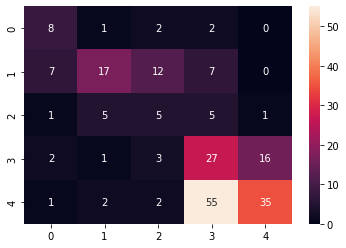

In [ ]:
vis=sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.savefig('confusion_matrix.png')

## SVM

In [ ]:
model=SVC()
model.fit(X, y)

#f1 score
from sklearn.metrics import f1_score
y_pred=model.predict(X_test)
print("Accuracy: ", model.score(X_test, y_test))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

Accuracy:  0.5069124423963134
F1 score:  0.36123881572689426
              precision    recall  f1-score   support

           1       0.80      0.31      0.44        13
           2       0.83      0.23      0.36        43
           3       0.25      0.06      0.10        17
           4       0.23      0.20      0.22        49
           5       0.56      0.89      0.69        95

    accuracy                           0.51       217
   macro avg       0.53      0.34      0.36       217
weighted avg       0.53      0.51      0.46       217



In [ ]:
model=SVC(kernel="rbf")
model.fit(X, y)

#f1 score
from sklearn.metrics import f1_score
y_pred=model.predict(X_test)
print("Accuracy: ", model.score(X_test, y_test))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

Accuracy:  0.5668202764976958
F1 score:  0.4443105581217348
              precision    recall  f1-score   support

           1       0.71      0.38      0.50        13
           2       0.83      0.47      0.60        43
           3       0.43      0.18      0.25        17
           4       0.38      0.12      0.18        49
           5       0.55      0.94      0.69        95

    accuracy                           0.57       217
   macro avg       0.58      0.42      0.44       217
weighted avg       0.57      0.57      0.51       217



In [ ]:
model=SVC()
model.fit(X, y)

#f1 score
from sklearn.metrics import f1_score
y_pred=model.predict(X_test)
print("Accuracy: ", model.score(X_test, y_test))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

Accuracy:  0.6359447004608295
F1 score:  0.5936548850131194
              precision    recall  f1-score   support

           1       0.73      0.62      0.67        13
           2       0.71      0.74      0.73        43
           3       0.36      0.29      0.32        17
           4       0.46      0.67      0.55        49
           5       0.79      0.63      0.70        95

    accuracy                           0.64       217
   macro avg       0.61      0.59      0.59       217
weighted avg       0.66      0.64      0.64       217



In [ ]:
model=SVC()
model.fit(X, y)

#f1 score
from sklearn.metrics import f1_score
y_pred=model.predict(X_test)
print("Accuracy: ", model.score(X_test, y_test))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

Accuracy:  0.6175115207373272
F1 score:  0.5702299379349908
              precision    recall  f1-score   support

           1       0.62      0.62      0.62        13
           2       0.67      0.72      0.70        43
           3       0.31      0.29      0.30        17
           4       0.45      0.67      0.54        49
           5       0.83      0.60      0.70        95

    accuracy                           0.62       217
   macro avg       0.58      0.58      0.57       217
weighted avg       0.66      0.62      0.63       217



In [ ]:
model=SVC()
model.fit(X, y)

#f1 score
from sklearn.metrics import f1_score
y_pred=model.predict(X_test)
print("Accuracy: ", model.score(X_test, y_test))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

Accuracy:  0.5253456221198156
F1 score:  0.408270762868464
              precision    recall  f1-score   support

           1       0.80      0.31      0.44        13
           2       0.80      0.28      0.41        43
           3       0.43      0.18      0.25        17
           4       0.26      0.22      0.24        49
           5       0.57      0.88      0.69        95

    accuracy                           0.53       217
   macro avg       0.57      0.37      0.41       217
weighted avg       0.55      0.53      0.49       217



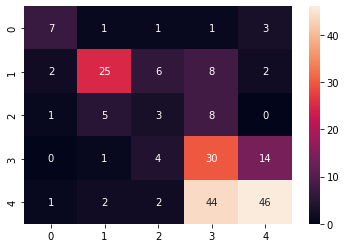

In [ ]:
vis=sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.savefig('confusion_matrix.png')

## Random Forest

In [ ]:
model=RandomForestClassifier()
model.fit(X, y)
y_pred=model.predict(X_test)
print("Accuracy: ", model.score(X_test, y_test))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

Accuracy:  0.5253456221198156
F1 score:  0.4451240306174107
              precision    recall  f1-score   support

           1       0.60      0.46      0.52        13
           2       0.77      0.40      0.52        43
           3       0.25      0.18      0.21        17
           4       0.27      0.31      0.29        49
           5       0.62      0.77      0.69        95

    accuracy                           0.53       217
   macro avg       0.50      0.42      0.45       217
weighted avg       0.54      0.53      0.52       217



In [ ]:
model=RandomForestClassifier()
model.fit(X, y)
y_pred=model.predict(X_test)
print("Accuracy: ", model.score(X_test, y_test))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

Accuracy:  0.5161290322580645
F1 score:  0.42722851694848474
              precision    recall  f1-score   support

           1       0.60      0.46      0.52        13
           2       0.79      0.35      0.48        43
           3       0.23      0.18      0.20        17
           4       0.30      0.24      0.27        49
           5       0.56      0.80      0.66        95

    accuracy                           0.52       217
   macro avg       0.50      0.41      0.43       217
weighted avg       0.52      0.52      0.49       217



In [ ]:
model=RandomForestClassifier()
model.fit(X, y)
y_pred=model.predict(X_test)
print("Accuracy: ", model.score(X_test, y_test))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

Accuracy:  0.6497695852534562
F1 score:  0.6161701802912307
              precision    recall  f1-score   support

           1       0.62      0.77      0.69        13
           2       0.79      0.60      0.68        43
           3       0.55      0.35      0.43        17
           4       0.45      0.67      0.54        49
           5       0.79      0.69      0.74        95

    accuracy                           0.65       217
   macro avg       0.64      0.62      0.62       217
weighted avg       0.68      0.65      0.66       217



In [ ]:
model=RandomForestClassifier()
model.fit(X, y)
y_pred=model.predict(X_test)
print("Accuracy: ", model.score(X_test, y_test))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

Accuracy:  0.6405529953917051
F1 score:  0.5902938088157573
              precision    recall  f1-score   support

           1       0.60      0.69      0.64        13
           2       0.74      0.60      0.67        43
           3       0.35      0.35      0.35        17
           4       0.48      0.63      0.55        49
           5       0.78      0.71      0.74        95

    accuracy                           0.64       217
   macro avg       0.59      0.60      0.59       217
weighted avg       0.66      0.64      0.65       217



In [ ]:
model=RandomForestClassifier()
model.fit(X, y)
y_pred=model.predict(X_test)
print("Accuracy: ", model.score(X_test, y_test))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

Accuracy:  0.511520737327189
F1 score:  0.4423698041089345
              precision    recall  f1-score   support

           1       0.60      0.46      0.52        13
           2       0.76      0.37      0.50        43
           3       0.22      0.24      0.23        17
           4       0.27      0.31      0.29        49
           5       0.62      0.74      0.67        95

    accuracy                           0.51       217
   macro avg       0.50      0.42      0.44       217
weighted avg       0.54      0.51      0.51       217



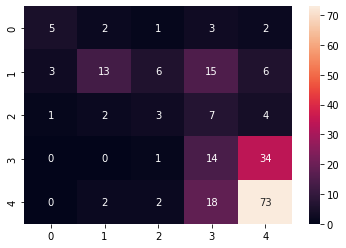

In [ ]:
vis=sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.savefig('confusion_matrix.png')

# Data Augmentation 

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.8/5.8 MB 45.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.6/7.6 MB 79.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 182.4/182.4 KB 16.5 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import AutoModel, AutoTokenizer,AutoModelWithLMHead
from transformers import pipeline, AutoModelWithLMHead, AutoTokenizer
from underthesea import word_tokenize
import random
import pandas as pd
from underthesea import pos_tag
phobert = AutoModel.from_pretrained("vinai/phobert-base")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
model_ = AutoModelWithLMHead.from_pretrained("vinai/phobert-base")
nlp = pipeline("fill-mask", model=model_,tokenizer=tokenizer)



Downloading:   0%|          | 0.00/557 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/895k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.8/dist-packages/transformers/models/auto/modeling_auto.py:1177: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


In [ ]:

def augment(text,num_sent):
    tagging=pos_tag(text)
    word_token=word_tokenize(text)
    index_n=[]
    for i in range(len(tagging)):
        if tagging[i][1]=='N':
            index_n.append(i)
    list_aug=[]
    list_score=[]
    print(index_n)
    for index in index_n:
        word_token_copy=word_token.copy()
        word_token_copy[index]='<mask>'
        text=' '.join(word_token_copy)
        new_text_list=nlp(text)
        score=[i['score'] for i in new_text_list]
        new_text_list=[i['sequence'] for i in new_text_list ]
        list_score+=score
        list_aug+=new_text_list
    dict_score={i:j for i,j in zip(list_aug,list_score)}
    return dict_score 
    # list_aug=sorted(dict_score.items(), key=lambda x: x[1],reverse=True)
    # list_aug=[i[0] for i in list_aug]
    # list_aug=[i for i in list_aug if i!=text][:3]
    # return list_aug[:3]
aug=(augment('Khe v·ªãn m·ªü c·ª≠a t·ªß qu·∫ßn √°o h∆°i c·∫°n n√™n khi m·ªü h∆°i kh√≥, d·ªÖ g√£y m√≥ng tay, n√™n kho√©t s√¢u h∆°n ho·∫∑c c√≥ n·∫Øm c·ª≠a b√™n ngo√†i.',3))

[3, 4, 8, 15, 16, 25, 26, 27]


In [ ]:
print(aug)

{'Khe v·ªãn m·ªü c·ª≠a m·∫∑c qu·∫ßn √°o h∆°i c·∫°n n√™n khi m·ªü h∆°i kh√≥, d·ªÖ g√£y m√≥ng tay, n√™n kho√©t s√¢u h∆°n ho·∫∑c c√≥ n·∫Øm c·ª≠a b√™n ngo√†i.': 0.12839145958423615, 'Khe v·ªãn m·ªü c·ª≠a sau qu·∫ßn √°o h∆°i c·∫°n n√™n khi m·ªü h∆°i kh√≥, d·ªÖ g√£y m√≥ng tay, n√™n kho√©t s√¢u h∆°n ho·∫∑c c√≥ n·∫Øm c·ª≠a b√™n ngo√†i.': 0.12647907435894012, 'Khe v·ªãn m·ªü c·ª≠a c·ªßa qu·∫ßn √°o h∆°i c·∫°n n√™n khi m·ªü h∆°i kh√≥, d·ªÖ g√£y m√≥ng tay, n√™n kho√©t s√¢u h∆°n ho·∫∑c c√≥ n·∫Øm c·ª≠a b√™n ngo√†i.': 0.07465775310993195, 'Khe v·ªãn m·ªü c·ª≠a ·ªü qu·∫ßn √°o h∆°i c·∫°n n√™n khi m·ªü h∆°i kh√≥, d·ªÖ g√£y m√≥ng tay, n√™n kho√©t s√¢u h∆°n ho·∫∑c c√≥ n·∫Øm c·ª≠a b√™n ngo√†i.': 0.051124487072229385, 'Khe v·ªãn m·ªü c·ª≠a b·∫±ng qu·∫ßn √°o h∆°i c·∫°n n√™n khi m·ªü h∆°i kh√≥, d·ªÖ g√£y m√≥ng tay, n√™n kho√©t s√¢u h∆°n ho·∫∑c c√≥ n·∫Øm c·ª≠a b√™n ngo√†i.': 0.045155514031648636, 'Khe v·ªãn m·ªü c·ª≠a t·ªß th∆∞·ªùng h∆°i c·∫°n n√™n khi m·ªü h∆°i kh√≥, d·ªÖ g√£y m√≥ng tay, n√™n kho√©t s√¢u h∆°n

In [ ]:
df=pd.read_csv("data.csv")
new_df=pd.DataFrame(columns=['Review','labels'])
review_list=[]
labels_list=[]
for i in range(len(df)):
    review=df['Review'][i]
    label=df['labels'][i]
    review_list=review_list+[review]
    labels_list=labels_list+[label]
    #print(review)
    try:
        aug=augment(review,3)
        review_list+=aug
        labels_list=labels_list+[label]*aug
        print(len(review_list))
        print(len(labels_list))
    except:
        continue
new_df['Review']=review_list
new_df['labels']=labels_list
new_df.to_csv("data_aug.csv",index=False)

[0, 2, 5, 10, 12, 14, 16, 18, 22, 23, 25, 34, 35, 38]
[1, 4, 7]
[0, 1, 3, 5, 7, 8, 11]
[0, 3, 6, 8, 10, 13, 17, 20, 21, 25, 27, 29, 31, 35, 37, 40, 43, 47, 51]
[0, 7, 9, 17]
[5, 9, 11, 12, 16, 24, 31]
[0, 9]
[0, 6, 13]
[0, 1, 5, 9, 14, 17, 18, 21, 24, 26, 30, 34, 37, 39, 43, 53]
[0, 3, 6, 7, 8, 16, 21, 23, 28, 31, 33, 38, 41, 42, 50, 52, 53, 57, 59, 62, 73]
[4]
[0, 8, 11]
[5, 8]
[0, 3, 9, 13, 14, 17, 18]
[0, 3, 5]
[1, 3, 5, 10, 12, 16, 18, 20]
[0, 4, 5]
[0, 6, 8, 10, 17, 19, 20, 21, 24, 25, 30, 36, 38, 45, 54, 63, 65, 72, 73, 75, 77, 88, 91, 92, 93, 95, 102, 107, 111, 112, 115, 120, 125, 127, 139, 140]
[0, 2, 7, 9, 11, 14, 19]
[0, 1, 5]
[3, 4, 8, 15, 16, 25, 26, 27]
[2, 3, 12, 13]
[0, 5, 7, 11, 13, 15, 19, 23]
[2, 4, 6, 12, 13, 15, 19, 26]
[0, 5, 11, 13, 20, 24, 26, 34]
[0, 1, 3, 7, 14, 15, 20, 21, 28, 31, 32, 34, 42, 44, 45, 47, 48, 52, 55]
[0, 4, 6]
[0, 3, 4, 5, 6, 7, 11, 13, 16, 17, 18, 21, 23]
[0, 1, 3, 4]
[2]
[0, 7, 9, 10, 11, 14, 15, 17]
[0, 1, 4, 6, 15, 16, 20, 22, 24, 29, 31, 3

Token indices sequence length is longer than the specified maximum sequence length for this model (435 > 256). Running this sequence through the model will result in indexing errors


[0, 7, 9, 15, 20, 27, 29, 39, 43, 47, 53, 56, 58, 60, 67, 78, 83, 85, 96, 104, 107, 108, 114, 118, 121, 124, 127, 132, 145, 148, 149, 151, 152, 154, 156, 157, 159, 160, 165, 170, 171, 173, 178, 179, 183, 187, 190, 194, 199, 200, 206, 214, 217, 221, 225, 226, 229, 233, 234, 235, 260, 266, 268, 277, 279, 280, 282, 284, 287, 291, 293, 301, 304, 305, 310, 312, 314, 315, 317, 319, 321, 324, 328, 332, 333, 334, 335, 337, 339, 348, 350, 354, 357]
[3, 5, 7, 13, 15, 19, 24, 33, 35, 37, 41, 43, 47, 53, 59]
[0, 3, 7, 11, 12, 14, 15]
[0, 1, 3, 9, 11, 12, 16, 18, 22, 25, 27, 29, 31, 34]
[0, 1]
[2, 7, 10, 12, 15, 21, 25]
[0, 3, 7, 11, 15, 18, 22, 29, 30, 34, 39, 40, 42, 43, 48, 55, 56, 59, 62, 67, 73]
[0, 1, 3, 8, 12, 16, 17, 23, 26, 30, 33, 42]
[2, 12, 13]
[4]
[0, 3, 5, 7, 12, 15, 18, 21, 23, 26, 27, 31, 33, 34, 38, 39, 42, 46, 50]
[0, 1, 2, 5, 6, 9, 16, 17]
[0, 2, 7, 15, 18, 21, 22, 24]
[2, 5, 13, 16, 17, 19, 21, 22, 24, 27, 30, 33, 35, 37, 39, 40, 43, 45, 47, 50, 54, 57, 58, 63, 64, 67, 69, 72, 7

In [ ]:
text="v·ªã tr√≠ kh√° b·∫•t ti·ªán cho ƒëo√†n ƒëi xe √¥ t√¥ v√¨ ƒë∆∞·ªùng m·ªôt chi·ªÅu v√† n·∫±m trong h·∫ªm"

In [ ]:
tagging=pos_tag(text)
print(tagging)

[('v·ªã tr√≠', 'N'), ('kh√°', 'R'), ('b·∫•t ti·ªán', 'A'), ('cho', 'E'), ('ƒëo√†n', 'N'), ('ƒëi', 'V'), ('xe', 'N'), ('√¥ t√¥', 'A'), ('v√¨', 'E'), ('ƒë∆∞·ªùng', 'N'), ('m·ªôt chi·ªÅu', 'V'), ('v√†', 'C'), ('n·∫±m', 'V'), ('trong', 'E'), ('h·∫ªm', 'N')]


In [ ]:
dict_score=augment(text,5)

[0, 4, 6, 9, 14]


In [ ]:
print(dict_score)

{'ƒê∆∞·ªùng kh√° b·∫•t ti·ªán cho ƒëo√†n ƒëi xe √¥ t√¥ v√¨ ƒë∆∞·ªùng m·ªôt chi·ªÅu v√† n·∫±m trong h·∫ªm': 0.5692278742790222, 'V·ªã_tr√≠ kh√° b·∫•t ti·ªán cho ƒëo√†n ƒëi xe √¥ t√¥ v√¨ ƒë∆∞·ªùng m·ªôt chi·ªÅu v√† n·∫±m trong h·∫ªm': 0.060610029846429825, 'N√≥ kh√° b·∫•t ti·ªán cho ƒëo√†n ƒëi xe √¥ t√¥ v√¨ ƒë∆∞·ªùng m·ªôt chi·ªÅu v√† n·∫±m trong h·∫ªm': 0.03340255096554756, 'L·ªô_tr√¨nh kh√° b·∫•t ti·ªán cho ƒëo√†n ƒëi xe √¥ t√¥ v√¨ ƒë∆∞·ªùng m·ªôt chi·ªÅu v√† n·∫±m trong h·∫ªm': 0.014765167608857155, 'Khu_v·ª±c kh√° b·∫•t ti·ªán cho ƒëo√†n ƒëi xe √¥ t√¥ v√¨ ƒë∆∞·ªùng m·ªôt chi·ªÅu v√† n·∫±m trong h·∫ªm': 0.012149202637374401, 'v·ªã tr√≠ kh√° b·∫•t ti·ªán cho ng∆∞·ªùi ƒëi xe √¥ t√¥ v√¨ ƒë∆∞·ªùng m·ªôt chi·ªÅu v√† n·∫±m trong h·∫ªm': 0.942931592464447, 'v·ªã tr√≠ kh√° b·∫•t ti·ªán cho vi·ªác ƒëi xe √¥ t√¥ v√¨ ƒë∆∞·ªùng m·ªôt chi·ªÅu v√† n·∫±m trong h·∫ªm': 0.015732822939753532, 'v·ªã tr√≠ kh√° b·∫•t ti·ªán cho ƒë·ªëi_t∆∞·ª£ng ƒëi xe √¥ t√¥ v√¨ ƒë∆∞·ªùng m·ªôt chi·ªÅu v√† n·∫±m trong h·∫ª

In [ ]:
list_aug=sorted(dict_score.items(), key=lambda x: x[1],reverse=True)

In [ ]:
list_aug[:5]

[('v·ªã tr√≠ kh√° b·∫•t ti·ªán cho ng∆∞·ªùi ƒëi xe √¥ t√¥ v√¨ ƒë∆∞·ªùng m·ªôt chi·ªÅu v√† n·∫±m trong h·∫ªm',
  0.942931592464447),
 ('v·ªã tr√≠ kh√° b·∫•t ti·ªán cho ƒëo√†n ƒëi xe √¥ t√¥ v√¨ ƒë∆∞·ªùng m·ªôt chi·ªÅu v√† n·∫±m trong.',
  0.6303555965423584),
 ('ƒê∆∞·ªùng kh√° b·∫•t ti·ªán cho ƒëo√†n ƒëi xe √¥ t√¥ v√¨ ƒë∆∞·ªùng m·ªôt chi·ªÅu v√† n·∫±m trong h·∫ªm',
  0.5692278742790222),
 ('v·ªã tr√≠ kh√° b·∫•t ti·ªán cho ƒëo√†n ƒëi xe √¥ t√¥ v√¨ ƒëi m·ªôt chi·ªÅu v√† n·∫±m trong h·∫ªm',
  0.5594411492347717),
 ('v·ªã tr√≠ kh√° b·∫•t ti·ªán cho ƒëo√†n ƒëi xe_ƒë·∫°p √¥ t√¥ v√¨ ƒë∆∞·ªùng m·ªôt chi·ªÅu v√† n·∫±m trong h·∫ªm',
  0.19018973410129547)]

In [ ]:
len(labels_list)

2988

In [ ]:
len(review_list)

2982

In [ ]:
new_df["Review"][0]

['Ph√≤ng c√≥ gi∆∞·ªùng l·ªõn, √™m ƒë·∫πp, s·∫°ch s·∫Ω,... L·ªÖ t√¢n is the best. Buffet ngon, thanh ƒë·∫°m. Kh√¥ng gian s·∫£nh sang ch·∫£nh tha h·ªì check in. C·∫£m ∆°n Ph∆∞∆°ng Linh ƒë√£ gi√∫p t·ª•i m√¨nh t√¨m 1 cƒÉn ph√≤ng v·ª´a √Ω. N·∫øu c√≥ d·ªãp m√¨nh s·∫Ω ch·ªçn cƒÉn Pano.',
 'Ph√≤ng c√≥ gi∆∞·ªùng l·ªõn, √™m ƒë·∫πp, s·∫°ch s·∫Ω,... L·ªÖ t√¢n is the best. Buffet ngon, thanh ƒë·∫°m. Kh√¥ng gian s·∫£nh sang ch·∫£nh ƒë·ªÉ check in. C·∫£m ∆°n Ph∆∞∆°ng Linh ƒë√£ gi√∫p t·ª•i m√¨nh t√¨m 1 cƒÉn ph√≤ng v·ª´a √Ω. N·∫øu c√≥ d·ªãp m√¨nh s·∫Ω ch·ªçn cƒÉn Pano.',
 'Ph√≤ng c√≥ gi∆∞·ªùng l·ªõn, √™m ƒë·∫πp, s·∫°ch s·∫Ω,... L·ªÖ t√¢n is the best. Buffet ngon, thanh ƒë·∫°m. Kh√¥ng gian s·∫£nh sang ch·∫£nh tha h·ªì check in. C·∫£m ∆°n Ph∆∞∆°ng Linh ƒë√£ gi√∫p t·ª•i m√¨nh t√¨m 1 cƒÉn ph√≤ng v·ª´a √Ω. N·∫øu c√≥ d·ªãp m√¨nh s·∫Ω ch·ªçn cƒÉn Pano.',
 'Ph√≤ng c√≥ gi∆∞·ªùng l·ªõn, √™m ƒë·∫πp, s·∫°ch s·∫Ω,... L·ªÖ t√¢n is the best. Buffet ngon, r·∫ª. Kh√¥ng gian s·∫£nh sang ch·∫£nh tha h·ªì check in. C·∫£m 

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5.8 MB 6.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 182 kB 37.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7.6 MB 54.5 MB/s 


# Demo

In [ ]:
sentences = [
    'Th·∫ßy d·∫°y r·∫•t hay',
    'Kh√¥ng ai h∆∞·ªõng d·∫´n, to√†n ph·∫£i t·ª± l·ª±c c√°nh sinh',
    'Ng∆∞·ªùi l√°i ƒë√≤ s√¥ng ƒê√†',
    'Th·∫ßy to√†n ƒë·ªçc slide, kh√¥ng gi·∫£ng b√†i',
    'Ph√≠ ti·ªÅn khi h·ªçc l·ªõp n√†y',
    'Anh h√πng v≈© tr·ª• Ph·∫°m Tu√¢n',
    'H·ªçc ph√≠ qu√° cao, c√¥ l·∫°i d·∫°y d·ªü, kh√¥ng ai h·ªó tr·ª£',
    'Tr·ª£ gi·∫£ng r·∫•t nhi·ªát t√¨nh',
    'Th·∫ßy t·∫≠n t√¨nh gi√∫p ƒë·ª° sinh vi√™n',
    'Tuy√™n ng√¥n ƒë·ªôc l·∫≠p qu·∫£ng tr∆∞·ªùng Ba ƒê√¨nh'
]

for s in sentences:
    predict_ = model_.predict(vectorizer_.transform([preprocess(s)]))
    
    print(s, predict_[0])

Th·∫ßy d·∫°y r·∫•t hay 2
Kh√¥ng ai h∆∞·ªõng d·∫´n, to√†n ph·∫£i t·ª± l·ª±c c√°nh sinh 0
Ng∆∞·ªùi l√°i ƒë√≤ s√¥ng ƒê√† 1
Th·∫ßy to√†n ƒë·ªçc slide, kh√¥ng gi·∫£ng b√†i 0
Ph√≠ ti·ªÅn khi h·ªçc l·ªõp n√†y 0
Anh h√πng v≈© tr·ª• Ph·∫°m Tu√¢n 1
H·ªçc ph√≠ qu√° cao, c√¥ l·∫°i d·∫°y d·ªü, kh√¥ng ai h·ªó tr·ª£ 0
Tr·ª£ gi·∫£ng r·∫•t nhi·ªát t√¨nh 2
Th·∫ßy t·∫≠n t√¨nh gi√∫p ƒë·ª° sinh vi√™n 2
Tuy√™n ng√¥n ƒë·ªôc l·∫≠p qu·∫£ng tr∆∞·ªùng Ba ƒê√¨nh 1


/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['t√≤a'] not in stop_words.
  warnings.warn(
